In [1]:
import matplotlib.pyplot as plt # used to create plots
from matplotlib.pyplot import figure # used to control size of plots
import numpy as np # for creation of arrays
import pandas as pd # for making data frames
import math # for plotting CMC using log10 scale

from sklearn import datasets, linear_model # linear regression model package
from sklearn.metrics import mean_squared_error, r2_score # statistics to score model 
from sklearn.model_selection import train_test_split # allows model to be tested on unseen data

In [2]:
def multi_linear_reg(cmc_data, num_var, var1, var2, var3, var4, show_data, split):
          
    '''
    
    multi_linear_reg:
    -----------------
    
    A function that takes in a a pandas dataframe containing ln(CMC) and descriptor values and uses a multi-linear
    regression model in order to find the coefficients and y-intercepts of the relationship.
    
    Args:
    -----
    
    cmc_data: pandas dataframe containing ln(CMC) values and descriptors being used
    num_var: tells model how many variables are being used to make model (up to 4)
    var1, var2, var3, var4: names of the variables being tested as strings so they can accessed in dataframe
    split: how much training data to use (e.g. 0.8 = 80% for training)
    show_data: boolean to say if information about regression should be printed (mean square error, 
    root mean square error and coefficient of determination)
    
    Returns:
    --------
    
    x_test: list of test data from the x-axis
    x_train: list of train data from the x-axis
    y_train: list of test data from the y-axis
    y_test: list of train data from the y-axis
    pred: list of predicted y-values using the x-test data
    var1_coef, var2_coef, var3_coef, var4_coef: gradients of relationship for each variable 
    intercept: y-intercept of predicted line
    was_test: list of booleans to say if data was used to test the model (True) or to train it (False)
    
    '''
    
    if num_var == 2: # collates required descriptors for the linear model depending on number chosen 
        collective = cmc_data.loc[:, [var1, var2]]
        ln_cmc = cmc_data.loc[:, ["ln_cmc"]]
    elif num_var == 3:
        collective = cmc_data.loc[:, [var1, var2, var3]]
        ln_cmc = cmc_data.loc[:, ["ln_cmc"]]
    elif num_var == 4:
        collective = cmc_data.loc[:, [var1, var2, var3, var4]]
        ln_cmc = cmc_data.loc[:, ["ln_cmc"]]
    
    indices = np.arange(len(ln_cmc)) # list of integer values making up the indices of the data
    
    # splits the model into training and test data
    x_train, x_test, y_train, y_test, train_ind, test_ind = train_test_split(collective, ln_cmc, indices, 
                                                                             train_size = split, random_state = 32)
    
    was_test = [] # returns boolean for each index to say if it was used as test data
    for ind in indices:
        if ind in train_ind:
            was_test.append(False)
        if ind in test_ind:
            was_test.append(True)
    
    regr = linear_model.LinearRegression() # creates linear regression model
    regr.fit(x_train, y_train) # fits model to training data
    pred = regr.predict(x_test) # make predictions using the testing set
 
    if num_var == 2:
        var1_coef = regr.coef_[0][0]  # finds coefficients of the predicted linear relationship for each 
        var2_coef = regr.coef_[0][1]  # descriptor used 
        var3_coef = np.nan
        var4_coef = np.nan
    elif num_var == 3:
        var1_coef = regr.coef_[0][0]                      
        var2_coef = regr.coef_[0][1]
        var3_coef = regr.coef_[0][2]
        var4_coef = np.nan
    elif num_var == 4:
        var1_coef = regr.coef_[0][0]                     
        var2_coef = regr.coef_[0][1]
        var3_coef = regr.coef_[0][2]
        var4_coef = regr.coef_[0][3]
        
    intercept = regr.intercept_ # y-intercept of the predicted linear relationship
    
    y_test_cmc = np.exp(y_test) # converts back to CMC before statistics calculated
    pred_cmc = np.exp(pred)
        
    mse = mean_squared_error(y_test_cmc, pred_cmc) # mean squared error of results
    rmse = np.sqrt(mean_squared_error(y_test_cmc, pred_cmc)) # root mean squared error 
    co_det = r2_score(y_test_cmc, pred_cmc) # coefficient of determination 
        
    if show_data:  # prints data if asked for 
        print("Mean squared error: %.2f" % mse)
        print("Root mean squared error: %.2f" % rmse)
        print("Coefficient of determination: %.2f" % co_det)
        print("Mean absolute error: %.2f" % mae)
        print("\n")
      
    return(x_test, x_train, y_train, y_test, pred, var1_coef, var2_coef, var3_coef, var4_coef, intercept, was_test)

In [3]:
def linear_reg_stats_average(cmc_data, num_var, var1, var2, var3, var4, split):
              
    '''
    
    linear_reg_stats_average:
    --------------------------
    
    A function that takes in the pandas dataframe and finds the average values of the statistics coefficient
    of determination, root mean square error and mean absolute error from the multi-linear relationship.
    
    Args:
    -----
    
    cmc_data: pandas dataframe containing ln(CMC) values and descriptors being used
    num_var: tells model how many variables are being used to make model
    var1, var2, var3, var4: names of the variables being tested as strings so they can accessed in dataframe
    split: test/train split
    
    Returns:
    --------
    
    rmse_av: average value of the root mean square error
    co_det_av: average value of the coefficient of determination
    mae_av: average value of the mean absolute error
    rmse_av_err, co_det_av_err, mae_av_err: standard deviation of the statistics
    
    '''
    
    rmse_list = []; co_det_list = []; mae_list = []
    rmse_total = 0; co_det_total = 0; mae_total = 0
    count = 0
    
    if num_var == 2: # collates required descriptors for the linear model depending on number chosen 
        collective = cmc_data.loc[:, [var1, var2]]
        ln_cmc = cmc_data.loc[:, ["ln_cmc"]]
    elif num_var == 3:
        collective = cmc_data.loc[:, [var1, var2, var3]]
        ln_cmc = cmc_data.loc[:, ["ln_cmc"]]
    elif num_var == 4:
        collective = cmc_data.loc[:, [var1, var2, var3, var4]]
        ln_cmc = cmc_data.loc[:, ["ln_cmc"]]
    
    for rs in range(100):
    
        # splits the model into training and test data
        x_train, x_test, y_train, y_test = train_test_split(collective, ln_cmc, train_size = split, 
                                                            random_state = rs)
    
        regr = linear_model.LinearRegression() # creates linear regression model
        regr.fit(x_train, y_train) # fits model to training data
        pred = regr.predict(x_test) # make predictions using the testing set
            
        y_test = np.array(y_test)
        y_test_cmc = ln_cmc_to_cmc(y_test) # converts back to CMC before statistics calculated
        pred_cmc = ln_cmc_to_cmc(pred)
        
        mse = mean_squared_error(y_test_cmc, pred_cmc) # mean squared error of results
        rmse = np.sqrt(mean_squared_error(y_test_cmc, pred_cmc)) # root mean squared error 
        co_det = r2_score(y_test_cmc, pred_cmc) # coefficient of determination  
        mae = float(sum(abs(y_test_cmc-pred_cmc)) / len(y_test_cmc)) # mean absolute error
        
        if co_det < 0.0: # assumes no correlation if below zero
            co_det = 0.0
            
        rmse_list.append(rmse); co_det_list.append(co_det); mae_list.append(mae)
            
        rmse_total += rmse # adds up the statistics values
        co_det_total += co_det
        mae_total += mae
        count += 1
    
    # finds the standard error of the statistics
    rmse_av_err = np.std(rmse_list, ddof=1) / np.sqrt(len(rmse_list))
    co_det_av_err = np.std(co_det_list, ddof=1) / np.sqrt(len(co_det_list))
    mae_av_err = np.std(mae_list, ddof=1) / np.sqrt(len(mae_list))
   
    rmse_av = rmse_total / count # finds the average by dividing by the number of loops
    co_det_av = co_det_total / count
    mae_av = mae_total / count
    
    print("RMSE Mean: ", round(rmse_av, 2))
    print("Coeff of Det Mean: ", round(co_det_av, 2))
    print("MAE Mean: ", round(mae_av, 2))
    print("\n")
    
    return(rmse_av, co_det_av, mae_av, rmse_av_err, co_det_av_err, mae_av_err)

In [4]:
def simple_lin_reg_stats_average(x_data, y_data, split):
              
    '''
    
    simple_lin_reg_stats_average:
    -----------------------------
    
    A function that takes in a list of x-data and y-data and finds the average values of the statistics coefficient
    of determination, root mean square error and mean absolute error using sklearn to find the simple, one
    variable linear relationship to compare to multi linear regression.
    
    Args:
    -----
    
    x_data: list of values for the x-axis
    y-data: list of values for the y-axis
    split: test/train split
    
    Returns:
    --------
    
    rmse_av: average value of the root mean square error
    co_det_av: average value of the coefficient of determination
    mae_av: average value of the mean absolute error
    rmse_av_err, co_det_av_err, mae_av_err: standard deviation of the statistics
    
    '''
    
    indices = np.arange(len(x_data)) # list of integer values making up the indices of the data
    
    rmse_list = []; co_det_list = []; mae_list = []
    rmse_total = 0; co_det_total = 0; mae_total = 0
    count = 0
    
    for rs in range(100):
        
        # splits the x- and y-test data randomly according to the specified ratio
        x_train, x_test, y_train, y_test, ind_train, ind_test = train_test_split(x_data, y_data, indices, 
                                                                                 train_size = split, 
                                                                                 random_state = rs)

        x_train_format = np.array(x_train) # reformat the lengths as numpy arrays as required to reshape later
        x_test_format = np.array(x_test)

        regr = linear_model.LinearRegression() # create linear regression object
        regr.fit(x_train_format.reshape(-1,1), y_train) # train the model using the training sets                                 
        pred = regr.predict(x_test_format.reshape(-1,1)) # make predictions using the testing set
        
        y_test_cmc = ln_cmc_to_cmc(y_test) # converts back to CMC before statistics calculated
        pred_cmc = ln_cmc_to_cmc(pred)
        
        mse = mean_squared_error(y_test_cmc, pred_cmc) # mean squared error of results
        rmse = np.sqrt(mean_squared_error(y_test_cmc, pred_cmc)) # root mean squared error
        co_det = r2_score(y_test_cmc, pred_cmc) # coefficient of determination 
        mae = sum(abs(y_test_cmc-pred_cmc)) / len(y_test_cmc) # mean absolute error 
        
        if co_det < 0.0: # assumes no correlation if below zero
            co_det = 0.0
            
        rmse_list.append(rmse); co_det_list.append(co_det); mae_list.append(mae)
            
        rmse_total += rmse # adds up the statistics values
        co_det_total += co_det
        mae_total += mae
        count += 1
     
    # finds the standard error of the statistics
    rmse_av_err = np.std(rmse_list, ddof=1) / np.sqrt(len(rmse_list))
    co_det_av_err = np.std(co_det_list, ddof=1) / np.sqrt(len(co_det_list))
    mae_av_err = np.std(mae_list, ddof=1) / np.sqrt(len(mae_list))
        
    rmse_av = rmse_total / count # finds the average by dividing by the number of loops
    co_det_av = co_det_total / count
    mae_av = mae_total / count
    
    return(rmse_av, co_det_av, mae_av, rmse_av_err, co_det_av_err, mae_av_err)

In [5]:
def ln_cmc_to_cmc(ln_cmc):
              
    '''
    
    ln_cmc_to_cmc:
    --------------
    
    A function that takes in the predicted ln(CMC) values and converts them to CMC values
    
    Args:
    -----
    
    ln_cmc: list of predicted ln_cmc values
    
    Returns:
    --------
    
    acc_cmc: numpy array of CMC values
    
    '''
          
    cmc_list = []
    
    for val in ln_cmc:
        cmc = np.exp(val) # converts to CMC using the exponential 
        cmc_list.append(cmc)
        
    arr_cmc = np.array(cmc_list)
        
    return(arr_cmc)

In [6]:
def predict_cmc(num_var, var1_coef, var2_coef, var3_coef, var4_coef, intercept, data1, data2, data3, data4):
              
    '''
    
    predict_cmc:
    ------------
    
    A function that takes in the gradient and y-intercept of its linear relationship and uses required data to 
    predict the cmc output according to the straight line equation (y = mx + c)
    
    Args:
    -----
    
    num_var: number of variables used in the model
    var1_coef, var2_coef, var3_coef, var4_coef: gradient values for each of the descriptors used
    intercept: y-intercept from multi-linear regression
    data1, data2, data3, data4: value of four descriptors that were used to train the model
    
    Returns:
    --------
    
    cmc: predicted cmc value
    
    '''
    
    if num_var == 2: # predicts CMC value based on predicted relationship
        ln_cmc = (var1_coef*data1) + (var2_coef*data2) + intercept # this returns the ln(cmc)
        cmc = np.exp(ln_cmc) # finds cmc using exponential 
    
    elif num_var == 3:
        ln_cmc = (var1_coef*data1) + (var2_coef*data2) + (var3_coef*data3) + intercept 
        cmc = np.exp(ln_cmc)                 
        
    elif num_var == 4:
        ln_cmc = (var1_coef*data1) + (var2_coef*data2) + (var3_coef*data3) + (var4_coef*data4) + intercept  
        cmc = np.exp(ln_cmc)         
    
    return(cmc)

In [7]:
def select_data(func_group, carbon_len, cmc_vals, mol_weight, val_elec, logp, endfunc_pos, startfunc_pos, 
                selector):
                  
    '''
    
    select_data:
    ------------
    
    A function that takes in a list of all data required and splits the data based on the required head groups
    
    Args:
    -----
    
    func_group: list of functional groups
    carbon_len, cmc_vals, mol_weight, val_elec, logp: descriptors being investigated
    endfunc_pos: list to show were each new head group data ends
    startfunc_pos: list to show were each new head group data starts
    selector: tells function which data to select
    
    Returns:
    --------
    
    select_{data}: returns same lists but with only selected data 
    
    '''
     
    select_func_group = []; select_carbon_len = []; select_cmc = []; select_ln_cmc = []
    select_MW = []; select_val_elec = []; select_logp = []
    
    for num in selector:  # uses the select list to find only the required data and adds to select list
        for FG in func_group[startfunc_pos[num]:endfunc_pos[num]]:
            select_func_group.append(FG)
        for CL in carbon_len[startfunc_pos[num]:endfunc_pos[num]]:
            select_carbon_len.append(CL)
        for CMC in cmc_vals[startfunc_pos[num]:endfunc_pos[num]]:
            select_cmc.append(CMC)
            select_ln_cmc.append(np.log(CMC))
        for MW in mol_weight[startfunc_pos[num]:endfunc_pos[num]]:
            select_MW.append(MW)
        for VE in val_elec[startfunc_pos[num]:endfunc_pos[num]]:
            select_val_elec.append(VE)
        for LP in logp[startfunc_pos[num]:endfunc_pos[num]]:
            select_logp.append(LP)
        
    return(select_func_group, select_carbon_len, select_cmc, select_ln_cmc, select_MW, select_val_elec, 
           select_logp)

In [8]:
def pred_true_cmc_data(cmc_vals_select, num_var, var1_coef, var2_coef, var3_coef, var4_coef, 
                       y_intercept, data1, data2, data3, data4, startfunc_pos, endfunc_pos, head_group):
                      
    '''
    
    pred_true_cmc_data:
    -------------------
    
    A function that takes in the gradients and y-intercept found from the linear relationship between the chosen
    descriptor and the CMC value and uses it to predict the CMC value based on the data given to train the 
    linear regression. It also finds the difference between the true CMC value and the predicted CMC value.
    
    Args:
    -----
    
    cmc_vals_select: CMC values for the data being tested
    data1, data2, data3, data4: list of values of four descriptors that were used to train the model
    num_var: number of variables used in the model
    var1_coef, var2_coef, var3_coef, var4_coef: gradient values for each of the descriptors used
    intercept: y-intercept from multi-linear regression
    startfunc_pos: list to show were each new head group data starts
    endfunc_pos: list to show were each new head group data ends
    head_group: identifies type of molecule
    
    Returns:
    --------
    
    sep_cmc_pred: list of lists of the predicted CMC value separated into different lists based on the head group
    sep_cmc_diff: list of lists of difference between measured and predicted CMC value
    
    '''
         
    cmc_vals_select_all = []
    for ls in cmc_vals_select: # loops through list of lists of cmcs separated based on head group 
        for idv in ls:
            cmc_vals_select_all.append(idv) # puts data into only one list
    
    pred_cmc_test = []
    for ind1, test_list1 in enumerate(data1): # loops through list of lists (based on head group)
        if num_var == 2:
            curr_grad1 = var1_coef[ind1] # finds associated gradients depending on number of descriptors
            curr_grad2 = var2_coef[ind1]  
            curr_grad3 = np.nan
            curr_grad4 = np.nan
        elif num_var == 3:
            curr_grad1 = var1_coef[ind1]                  
            curr_grad2 = var2_coef[ind1]
            curr_grad3 = var3_coef[ind1]
            curr_grad4 = np.nan
        elif num_var == 4:
            curr_grad1 = var1_coef[ind1]                 
            curr_grad2 = var2_coef[ind1]
            curr_grad3 = var3_coef[ind1]
            curr_grad4 = var4_coef[ind1]
        test_list2 = data2[ind1]
        test_list3 = data3[ind1]
        test_list4 = data4[ind1]
        curr_inter = y_intercept[ind1][0] # finds y-intercept value
        for ind2, test1 in enumerate(test_list1): # loops through data to test for each head group
            # predicts CMC value 
            cmc_pred_val = predict_cmc(num_var, curr_grad1, curr_grad2, curr_grad3, curr_grad4, curr_inter, 
                                       test1, test_list2[ind2], test_list3[ind2], test_list4[ind2])
            pred_cmc_test.append(cmc_pred_val)
    
    pred_cmc_test_all = []; pred_cmc_diff = []
    for ind, pred_val in enumerate(pred_cmc_test): # loops through predicted values
        diff = abs(cmc_vals_select_all[ind] - pred_val) # finds difference between predicted and measured
        pred_cmc_diff.append(diff)
    
    # puts back into a list of lists based on head group
    sep_cmc_pred = []; sep_cmc_diff = []
    for num in range(len(head_group)):  
        indiv_pred = []; indiv_diff = []
        for pred in pred_cmc_test[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_pred.append(pred) # reassigns the predicted value back to the head group associated with it
        for diff in pred_cmc_diff[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_diff.append(diff) # does the same for difference between predicted and measured
        sep_cmc_pred.append(indiv_pred) # puts data back into a list of lists based on head group
        sep_cmc_diff.append(indiv_diff)
    
    return(sep_cmc_pred, sep_cmc_diff)

In [9]:
def pred_true_cmc_data_all(cmc_vals_select, num_var, var1_coef, var2_coef, var3_coef, var4_coef, 
                           y_intercept, data1, data2, data3, data4, startfunc_pos, endfunc_pos, head_group,
                           was_test):
                      
    '''
    
    pred_true_cmc_data_all:
    -----------------------
    
    A function that takes in the gradients and y-intercept found from the linear relationship between the chosen
    descriptor and the CMC value and uses it to predict the CMC value based on the data given to train the 
    linear regression. This is for the case where gradients and y-interepts were found from all data, not 
    separated by head group. It also finds the difference between the true CMC value and the predicted CMC value.
    
    Args:
    -----
    
    cmc_vals_select: CMC values for the data being tested
    func_group: list of head groups of each of the molecules
    var1_coef, var2_coef, var3_coef, var4_coef: gradient values for each of the descriptors used
    y_intercept: y-intercept value for relationship
    data1, data2, data3, data4: list of values of four descriptors that were used to train the model
    startfunc_pos: list to show were each new head group data starts
    endfunc_pos: list to show were each new head group data ends
    head_group: identifies type of molecule
    was_test: list of booleans to say if data was used to test the model (True) or to train it (False)
    
    Returns:
    --------
    
    sep_cmc_pred: list of lists of the predicted CMC value separated into different lists based on the head group
    sep_cmc_diff: list of lists of difference between measured and predicted CMC value
    
    '''
    
    pred_cmc_test = []
    for ind, test1 in enumerate(data1): # loops through list and finds corresponding data
        test2 = data2[ind]
        test3 = data3[ind]
        test4 = data4[ind]
        cmc_pred_val = predict_cmc(num_var, var1_coef, var2_coef, var3_coef, var4_coef, y_intercept[0], 
                                   test1, test2, test3, test4) # uses function to predict CMC value
        pred_cmc_test.append(cmc_pred_val) # appends value to list
    
    pred_cmc_diff = []
    for ind, pred_val in enumerate(pred_cmc_test): # loops through predicted values
        diff = abs(cmc_vals_select[ind] - pred_val) # finds difference between predicted and measured CMC value
        pred_cmc_diff.append(diff)
     
    # puts back into a list of lists based on head group
    sep_cmc_pred = []; sep_cmc_diff = []; sep_was_test = []
    for num in range(len(head_group)): # loops through each head group
        indiv_pred = []; indiv_diff = []; indiv_was_test = []
        for pred in pred_cmc_test[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_pred.append(pred) # reassigns the predicted value back to the head group associated with it
        for diff in pred_cmc_diff[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_diff.append(diff) # does the same for difference between predicted and measured
        for test in was_test[startfunc_pos[num]:endfunc_pos[num]]:
            indiv_was_test.append(test)
        sep_cmc_pred.append(indiv_pred); sep_cmc_diff.append(indiv_diff); sep_was_test.append(indiv_was_test)
    
    return(sep_cmc_pred, sep_cmc_diff, sep_was_test)

In [10]:
def pred_meas_cmc_plotter(cmc_pred, cmc_measured, meas_max, pred_max, was_test, plot_as_log, colours, head_group, 
                          file_name, save_fig):
                                  
    '''
    
    pred_meas_cmc_plotter:
    ----------------------
    
    A function that plots the predicted CMC value against the measured CMC value and the predicted CMC value 
    calculated using one of the linear relationships between ln(CMC) and a descriptor with colour codes based on 
    the head group
    
    Args:
    -----
    
    cmc_pred: predicted CMC value
    cmc_measured: measured CMC value
    meas_max: maximum measured value that should be plotted (used to zoom in on smaller regions)
    pred_max: maximum predicted value that should be plotted
    plot_as_log: boolean to say if log10 scale should be used in plot
    colours: dictionary of head groups and their corresponding colours
    head_group: identifies type of molecule
    file_name: name of file to save figure as
    save_fig: boolean to say if the figure should be saved
    
    Returns:
    --------
    
    plot showing predicted (using one of the descriptors) and measured CMC value for the individual head group
    
    '''
     
    # labels prevent head group showing up multiple times in legend
    CO2Na_label = 0; NH3Cl_label = 0; NMe3Br_label = 0; OSO3Na_label = 0; SO3Na_label = 0; PyBr_label = 0
    Ethoxylates_label = 0; Carboxylic_Acid_label = 0; NMe2NBzCl_label = 0; NH3Ac_label = 0; SO3H_label = 0

    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    new_meas = []; new_pred = []
    
    for ind1, pred_list in enumerate(cmc_pred): # plots based on head group
        meas_list = cmc_measured[ind1]
        curr_head = head_group[ind1]
        curr_was_test = was_test[ind1]
        for ind2, pred in enumerate(pred_list):
            test = curr_was_test[ind2] # changes marker, fill and size depending on whether the point is test or 
            if test:                    # training data
                mark = "v"
                size = 36
                mfc = colours[curr_head]
                mec = colours[curr_head]
            else:
                mark = "o"
                size= 28
                mfc = "None"
                mec = colours[curr_head]
                
            meas = meas_list[ind2]
            
            if plot_as_log:
                meas = math.log10(meas)
                pred = math.log10(pred)
        
            new_meas.append(meas)
            new_pred.append(pred)
            
            if meas < meas_max and pred < pred_max: # only plots values below the specified max
 
            # checks if the individual head group has already been labelled in the legend and if not, plots the
            # data with the label corresponding to the head group
                if CO2Na_label == 0 and curr_head == "CO2Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    CO2Na_label += 1
                elif NH3Cl_label == 0 and curr_head == "NH3Cl":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    NH3Cl_label += 1
                elif NMe3Br_label == 0 and curr_head == "NMe3Br":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    NMe3Br_label += 1
                elif OSO3Na_label == 0 and curr_head == "OSO3Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    OSO3Na_label += 1
                elif SO3Na_label == 0 and curr_head == "SO3Na":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    SO3Na_label += 1
                elif PyBr_label == 0 and curr_head == "PyBr":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    PyBr_label += 1
                elif Ethoxylates_label == 0 and curr_head == "Ethoxylates":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    Ethoxylates_label += 1
                elif Carboxylic_Acid_label == 0 and curr_head == "Carboxylic Acid":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    Carboxylic_Acid_label += 1
                elif NMe2NBzCl_label == 0 and curr_head == "NMe2NBzCl":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    NMe2NBzCl_label += 1
                elif SO3H_label == 0 and curr_head == "SO3H":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    SO3H_label += 1
                elif NH3Ac_label == 0 and curr_head == "NH3Ac":  
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, label = curr_head, 
                                marker = mark)
                    NH3Ac_label += 1
                else: # if it already has a label, it plots without one to avoid multiples in the legend
                    plt.scatter(meas, pred, s = size, facecolors = mfc, edgecolors = mec, marker = mark)
    
    highest_num = max(max(new_meas), max(new_pred)) # finds largest value in both lists
    lowest_num = min(min(new_meas), min(new_pred))
    if highest_num > meas_max or highest_num > pred_max:
        highest_num = max(meas_max, pred_max)
    
    all_num_list = np.arange(lowest_num, highest_num, 1.0) # plots line where pred equals measured for comparison
    plt.plot(all_num_list, all_num_list, linestyle = "dashed", color = "black", linewidth = 0.5)

    if plot_as_log:
        y_lab = "Predicted log(CMC / mM)"
        x_lab = "Measured log(CMC / mM)"
    else:
        y_lab = "Predicted CMC / mM"
        x_lab = "Measured CMC / mM"
        
    plt.ylabel(y_lab, fontsize = 20)
    plt.xlabel(x_lab, fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "x-large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [11]:
def lin_reg_stats_plot(variable_data, variable_all, var_other, other_name, variable_name, stat_name, head_group, 
                       colours, plot_other, file_name, save_fig):
                              
    '''
    
    lin_reg_stats_plot:
    --------------------
    
    Function that plots the statistics resulting from simple linear regression and multi-linear regression to 
    compare for each head group
    
    Args:
    -----
    
   variable_data: list of statistic values 
   variable_all: list of variable values from linear regression of whole data set to compare
   var_other: data from linear mixed model and random forest to compare 
   other_name: name of other models to plot
   variable_name: descriptor being plotted
   stat_name: statistic being used
   head_group: list of head groups
   colours: dictionary of colours relating to head groups
   plot_other: boolen to say if results from random forest and linear mixed models should be added to compare
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot showing the predicted relationship between ln(CMC) and the descriptor using linear regression for each 
    head group
    
    '''

    label2 = 0 # labels prevent head group showing up multiple times in legend
    label3 = 0
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    plt.axvspan(-0.5, 3.5, facecolor = "lightyellow") # background colour to compare to 
    plt.axvspan(3.5, 8.5, facecolor = "lightcyan")
    if plot_other:
        plt.axvspan(8.5, 10.5, facecolor = "lavender")
        plt.axvspan(10.5, 13.5, facecolor = "blanchedalmond")
    
    for select in range(len(head_group)):
        curr_head = head_group[select]
        curr_var_data = variable_data[select]
    
        label1 = 0 # labels prevent head group showing up multiple times in legend
        
        for ind, des in enumerate(curr_var_data):
            if ind < 4:
                name = "LR: " + variable_name[ind] # name of descriptors used
            elif 4 <= ind < 9:
                name = "MLR: " + variable_name[ind]
            else:
                name = variable_name[ind]
            des_all = variable_all[ind]
            
            if label2 == 0:
                plt.scatter(name, des_all, s = 36, c = "black", label = "All Molecules", marker = "v", 
                                alpha = 0.8)
                label2 += 1
            else:
                plt.scatter(name, des_all, s = 36,  c = "black", marker = "v", alpha = 0.8)
            
            if label1 == 0: # used to check if the data has been labelled in the legend yet 
                            # if not, it plots with the label corresponding to the head group
                plt.scatter(name, des, s = 20, c = colours[curr_head], label = curr_head)
                label1 += 1
            else: # if it already has a label, it plots without one to avoid multiples in the legend
                plt.scatter(name, des, s = 20, c = colours[curr_head])
    
    if plot_other: # plots other models to compare if asked for
        plt.scatter(other_name, var_other, s = 36, c = "black", label = "Overall Predicton", marker = "v")
    
    plt.ylabel(stat_name, fontsize = 20)
    plt.xlabel("Model", fontsize = 20)
    plt.xticks(rotation = 45, ha = "right", fontsize = 20)
    plt.yticks(fontsize = 20)
    legend = plt.legend(bbox_to_anchor = (1.02, 1), loc = "upper left", borderaxespad = 0, fontsize = "large")
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [12]:
def lin_reg_stats_plot_double(var_data1, var_data2, var_all1, var_all2, var_other1, var_other2, other_name, 
                              variable_name, name1, name2, head_group, colours, plot_other, file_name, save_fig):
                              
    '''
    
    lin_reg_stats_plot_double:
    ---------------------------
    
    Function that plots 2 statistics resulting from simple linear regression and multi-linear regression to 
    compare for each head group on the same graph
    
    Args:
    -----
    
   var_data1 + var_data2: list of statistic values for both stats values
   var_all1 + var_all2: list of variable values from linear regression for both stats of whole data set to compare
   var_other1 + var_other2: data from linear mixed model and random forest to compare for both stats
   other_name: name of other models to plot
   variable_name: descriptor being plotted
   name1 + name2: statistics being used
   head_group: list of head groups
   colours: dictionary of colours relating to head groups
   plot_other: boolen to say if results from random forest and linear mixed models should be added to compare
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved 
    
    Returns:
    --------
    
    plot showing the predicted relationship between ln(CMC) and the descriptor using linear regression for each 
    head group using 2 different statistics
    
    '''

    label2 = 0 # labels prevent head group showing up multiple times in legend
    label3 = 0
    
    fig, ax1 = plt.subplots() 
    ax2 = ax1.twinx() # used to create 2 different y-axes
    
    fig.set_figwidth(7.5) # changes size of plot to make results more clear
    fig.set_figheight(6)
    
    ax1.axvspan(-0.5, 3.5, facecolor = "lightyellow") # background colour to compare to 
    ax1.axvspan(3.5, 8.5, facecolor = "lightcyan")
    if plot_other:
        ax1.axvspan(8.5, 10.5, facecolor = "lavender")
        ax1.axvspan(10.5, 13.5, facecolor = "blanchedalmond")
    
    for select in range(len(head_group)):
        curr_head = head_group[select]
        curr_var_data1 = var_data1[select]
        curr_var_data2 = var_data2[select]
    
        label1 = 0 # labels prevent head group showing up multiple times in legend
        
        for ind, des1 in enumerate(curr_var_data1):
            des2 = curr_var_data2[ind]
            if ind < 4:
                name_plot = "LR: " + variable_name[ind] # name of descriptors used
            elif 4 <= ind < 9:
                name_plot = "MLR: " + variable_name[ind]
            else:
                name_plot = variable_name[ind]
            des_all1 = var_all1[ind]
            des_all2 = var_all2[ind]
            
            if label2 == 0:
                # plots both stats on different axes
                ax1.scatter(name_plot, des_all1, s = 30, c = "black", label = "All Molecules", marker = "v", 
                            alpha = 0.8)
                ax2.scatter(name_plot, des_all2, s = 30, edgecolors = "black", facecolors = "none", 
                            label = "All Molecules", marker = "v", alpha = 0.8)
                label2 += 1
            else:
                ax1.scatter(name_plot, des_all1, s = 30,  c = "black", marker = "v", alpha = 0.8)
                ax2.scatter(name_plot, des_all2, s = 30,  edgecolors = "black", facecolors = "none", 
                            marker = "v", alpha = 0.8)
            
            if label1 == 0: # used to check if the data has been labelled in the legend yet 
                            # if not, it plots with the label corresponding to the head group
                ax1.scatter(name_plot, des1, s = 26, c = colours[curr_head], label = curr_head)
                ax2.scatter(name_plot, des2, s = 26, edgecolors = colours[curr_head], facecolors = "none", 
                            label = curr_head)
                label1 += 1
            else: # if it already has a label, it plots without one to avoid multiples in the legend
                ax1.scatter(name_plot, des1, s = 26, c = colours[curr_head])
                ax2.scatter(name_plot, des2, s = 26, edgecolors = colours[curr_head], facecolors = "none")
    
    if plot_other: # other models data to compare
        p1 = ax1.scatter(other_name, var_other1, s = 30, c = "black", label = "Overall Predicton", marker = "v")
        p2 = ax2.scatter(other_name, var_other2, s = 30, edgecolors = "black", facecolors = "none", 
                         label = "Overall Predicton", marker = "v")
    
    ax1.set_xlabel("Model", fontsize = 20)
    ax1.set_ylabel(name1, fontsize = 20)
    ax2.set_ylabel(name2, fontsize = 20)
    ax1.tick_params(axis = "y", labelsize = 20)
    ax2.tick_params(axis = "y", labelsize = 20)
    ax1.tick_params(axis = "x", rotation = 80, labelsize = 15)
    ax2.tick_params(axis = "x", rotation = 80, labelsize = 15)
    plt.legend([p1, p2], [name1, name2])
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [13]:
def export_legend(legend, filename):
                              
    '''
    
    export_legend:
    ---------------
    
    Function that saves legend as separate figure
    
    Args:
    -----
    
   legend: legend from graph
   filename: name to figure as 
    
    
    Returns:
    --------
    
    saves legend as separate figure
    
    '''
        
    expand = [-10, -10, 10, 10]
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi = 500, bbox_inches = bbox)
    
    return

In [14]:
def lin_reg_stats_plot_all(variable_data, variable_name, stat_name, file_name, save_fig):
                              
    '''
    
    lin_reg_stats_plot_all:
    ------------------------
    
    Function that plots the statistics resulting from simple linear regression and multi-linear regression to 
    compare when predicting from the entire set of molecules
    
    Args:
    -----
    
   variable_data: list of statistic values 
   variable_name: descriptor being plotted
   stat_name: statistic being used
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot showing the predicted relationship between ln(CMC) and the descriptor using linear regression for each 
    head group
    
    '''
    
    f = plt.figure() # changes size of plot to make results more clear
    f.set_figwidth(7.5)
    f.set_figheight(6)
    
    plt.axvspan(-0.5, 3.5, facecolor = "lightyellow") # background colour to compare to 
    plt.axvspan(3.5, 8.5, facecolor = "lightcyan")
    
    for ind, name in enumerate(variable_name):
        curr_data = variable_data[ind]
        plt.scatter(name, curr_data, s = 36, c = "black", marker = "v")

    
    plt.ylabel(stat_name, fontsize = 20)
    plt.xlabel("Descriptor", fontsize = 20)
    plt.xticks(rotation = 45, ha = "right", fontsize = 20)
    plt.yticks(fontsize = 20)
    
    if 0.0 in variable_data: # changes limits if on edge of graph
        plt.ylim([0-0.02, max(variable_data)+0.05])
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [15]:
def lin_reg_stats_plot_all_double(var_data1, var_data2, variable_name, name1, name2, file_name, save_fig):
                              
    '''
    
    lin_reg_stats_plot_all_double:
    -------------------------------
    
    Function that plots 2 statistics resulting from simple linear regression and multi-linear regression to 
    compare when predicting from the entire set of molecules on the same graph
    
    Args:
    -----
    
   var_data1 + var_data2: list of both statistic values 
   variable_name: descriptor being plotted
   name1 + name2: names of statistics being used
   file_name: name of file to save figure as
   save_fig: boolean to say if figure should be saved
    
    
    Returns:
    --------
    
    plot showing the predicted relationship between ln(CMC) and the descriptor using linear regression for each 
    head group using 2 different statistics
    
    '''
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    ax1.axvspan(-0.5, 3.5, facecolor = "lightyellow") # background colour to compare to 
    ax1.axvspan(3.5, 8.5, facecolor = "lightcyan")
    
    for ind, name in enumerate(variable_name):
        curr_data1 = var_data1[ind]
        curr_data2 = var_data2[ind]

        # plots both stats on different axes
        p1 = ax1.scatter(name, curr_data1, s = 36, c = "black", marker = "v")
        p2 = ax2.scatter(name, curr_data2, s = 36, edgecolors = "black", facecolors = "none", marker = "v")

    fig.set_figwidth(7.5) # changes size of plot to make results more clear
    fig.set_figheight(6)
    
    ax1.set_xlabel("Descriptor", fontsize = 20)
    ax1.set_ylabel(name1, fontsize = 20)
    ax2.set_ylabel(name2, fontsize = 20)
    ax1.tick_params(axis = "y", labelsize = 20)
    ax2.tick_params(axis = "y", labelsize = 20)
    ax1.tick_params(axis = "x", rotation = 75, labelsize = 15)
    ax2.tick_params(axis = "x", rotation = 75, labelsize = 15)
    plt.legend([p1, p2], [name1, name2])
    
    if 0.0 in var_data1: # changes limits to fit data in
        ax1.set_ylim(0-0.02, max(var_data1)+0.05)
    if 0.0 in var_data2:
        ax2.set_ylim(0-0.02, max(var_data2)+0.05)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")
    
    plt.show()
    
    return

In [16]:
# reads in data about the critical micelle concentration, values are separated by a comma
cmc_data = pd.read_csv(open("Submit_Data/output_descriptors.csv"), 
                       delimiter = (","))  

func_group = list(cmc_data["func_group"]); carbon_len = list(cmc_data["carbon_len"])
cmc_vals = list(cmc_data["CMC"]); mol_weight = list(cmc_data["MW"])
val_elec = list(cmc_data["NVE"]); logp_vals = list(cmc_data["logP"])

In [17]:
endfunc_pos = []
startfunc_pos = [0]

# finds index where each head group starts and ends 
for ind, func in enumerate(func_group):  # loops through list of head groups
    if ind < (len(func_group)-1) and func != func_group[ind+1]: # checks if next elem in list has same head group
        startfunc_pos.append(ind+1)
        endfunc_pos.append(ind+1)
    elif ind == (len(func_group)-1):     # on the last one, only append to end position list
        endfunc_pos.append(ind+1)

In [18]:
# calculates ln(CMC) and makes data being used into a separate data frame
ln_cmc_vals = []
for cmc in cmc_vals:
    ln_cmc = np.log(cmc)
    ln_cmc_vals.append(ln_cmc)

cmc_data_sim = pd.DataFrame(ln_cmc_vals, columns = ["ln_cmc"])
cmc_data_sim["MW"] = mol_weight
cmc_data_sim["NVE"] = val_elec
cmc_data_sim["logp"] = logp_vals
cmc_data_sim["carbon_len"] = carbon_len

In [19]:
# list of descriptors being compared
descriptor_list = ["Carbon Length", "logP", "MW", "NVE", "cLen + MW", "logP + NVE", "cLen + MW + NVE",
                   "cLen + logP + NVE", "All"]

In [20]:
# dictionary of colours for plotting each head group
colours = {"CO2Na" : "steelblue", "NH3Cl" : "orange", "NMe3Br" : "green", "OSO3Na" : "red", 
           "SO3Na" : "mediumorchid", "PyBr" : "navy", "Ethoxylates" : "pink", "Carboxylic Acid" : "gray",
           "NMe2NBzCl" : "darkseagreen", "SO3H" : "peru", "NH3Ac" : "magenta"}

### Separates data based on head group

In [21]:
head_group = []; g1_grad1 = []; g1_grad2 = []; g1_grad3 = []; g1_grad4 = []; g1_y_intercept = []
g2_grad1 = []; g2_grad2 = []; g2_grad3 = []; g2_grad4 = []; g2_y_intercept = []
g3_grad1 = []; g3_grad2 = []; g3_grad3 = []; g3_grad4 = []; g3_y_intercept = []
g4_grad1 = []; g4_grad2 = []; g4_grad3 = []; g4_grad4 = []; g4_y_intercept = []
g5_grad1 = []; g5_grad2 = []; g5_grad3 = []; g5_grad4 = []; g5_y_intercept = []
cmc_vals_select = []; logp_vals_select = []; carbon_len_select = []; MW_select = []; NVE_select = []
ln_cmc_select = []

g1_test_ind_list = []; g2_test_ind_list = []; g3_test_ind_list = []; g4_test_ind_list = []; g5_test_ind_list = []

RMSE = []; co_det = []; MAE = []; RMSE_err = []; co_det_err = []; MAE_err = []

show_data = False

for group in range(len(colours)):
    selector = [group] # selects each different head group separately
    # uses function to separate all the data at each individual head group
    FG, CL, CMC, LnCMC, MW, VE, LP = select_data(func_group, carbon_len, cmc_vals, mol_weight, val_elec,logp_vals, endfunc_pos, startfunc_pos, selector)
    
    cmc_vals_select.append(CMC) # list of a list with each head group being in a separate list
    ln_cmc_select.append(LnCMC); carbon_len_select.append(CL); logp_vals_select.append(LP)
    MW_select.append(MW); NVE_select.append(VE)
    
    rmse_des = []; co_det_des = []; mae_des = []; rmse_err_des = []; co_det_err_des = []; mae_err_des = []
    
    print("Head Group: ", FG[0])
    head_group.append(FG[0]) 
    
    cmc_data_single = pd.DataFrame(ln_cmc_select[group], columns = ["ln_cmc"])
    cmc_data_single["MW"] = MW_select[group]
    cmc_data_single["NVE"] = NVE_select[group]
    cmc_data_single["logp"] = logp_vals_select[group]
    cmc_data_single["carbon_len"] = carbon_len_select[group]
    
    # finds average of statistics values for simple linear regression to compare
    rmse_av_CL, co_det_av_CL, mae_av_CL, rmse_av_err_CL, co_det_av_err_CL, mae_av_err_CL = simple_lin_reg_stats_average(CL, LnCMC, 0.7)
    rmse_des.append(rmse_av_CL); co_det_des.append(co_det_av_CL); mae_des.append(mae_av_CL)
    rmse_err_des.append(rmse_av_err_CL); co_det_err_des.append(co_det_av_err_CL); mae_err_des.append(mae_av_err_CL)
    
    rmse_av_LP, co_det_av_LP, mae_av_LP, rmse_av_err_LP, co_det_av_err_LP, mae_av_err_LP = simple_lin_reg_stats_average(LP, LnCMC, 0.7)
    rmse_des.append(rmse_av_LP); co_det_des.append(co_det_av_LP); mae_des.append(mae_av_LP)
    rmse_err_des.append(rmse_av_err_LP); co_det_err_des.append(co_det_av_err_LP); mae_err_des.append(mae_av_err_LP)
    
    rmse_av_MW, co_det_av_MW, mae_av_MW, rmse_av_err_MW, co_det_av_err_MW, mae_av_err_MW = simple_lin_reg_stats_average(MW, LnCMC, 0.7)
    rmse_des.append(rmse_av_MW); co_det_des.append(co_det_av_MW); mae_des.append(mae_av_MW)
    rmse_err_des.append(rmse_av_err_MW); co_det_err_des.append(co_det_av_err_MW); mae_err_des.append(mae_av_err_MW)
    
    rmse_av_NVE, co_det_av_NVE, mae_av_NVE, rmse_av_err_NVE, co_det_av_err_NVE, mae_av_err_NVE = simple_lin_reg_stats_average(VE, LnCMC, 0.7)
    rmse_des.append(rmse_av_NVE); co_det_des.append(co_det_av_NVE); mae_des.append(mae_av_NVE)
    rmse_err_des.append(rmse_av_err_NVE); co_det_err_des.append(co_det_av_err_NVE); mae_err_des.append(mae_av_err_NVE)
    
    # finds gradients and y-intercepts of different combinations of descriptors
    # also calculates average of statistics values
    print("1: cLen + MW")
    g1_x_test, g1_x_train, g1_y_train, g1_y_test, g1_pred, g1_var1_coef, g1_var2_coef, g1_var3_coef, g1_var4_coef, g1_intercept, g1_test_ind = multi_linear_reg(cmc_data_single, 2, "MW", "carbon_len", "n/a", "n/a", show_data, 0.7)
    g1_test_ind_list.append(g1_test_ind)
    g1_grad1.append(g1_var1_coef); g1_grad2.append(g1_var2_coef); g1_grad3.append(g1_var3_coef); g1_grad4.append(g1_var4_coef) 
    g1_y_intercept.append(g1_intercept)
    
    rmse_av_G1, co_det_av_G1, mae_av_G1, rmse_av_err_G1, co_det_av_err_G1, mae_av_err_G1 = linear_reg_stats_average(cmc_data_single, 2, "MW", "carbon_len", "n/a", "n/a", 0.7)
    rmse_des.append(rmse_av_G1); co_det_des.append(co_det_av_G1); mae_des.append(mae_av_G1)
    rmse_err_des.append(rmse_av_err_G1); co_det_err_des.append(co_det_av_err_G1); mae_err_des.append(mae_av_err_G1)
    
    print("2: logP + NVE")
    g2_x_test, g2_x_train, g2_y_train, g2_y_test, g2_pred, g2_var1_coef, g2_var2_coef, g2_var3_coef, g2_var4_coef, g2_intercept, g2_test_ind = multi_linear_reg(cmc_data_single, 2, "logp", "NVE", "n/a", "n/a", show_data, 0.7)
    g2_test_ind_list.append(g2_test_ind)
    g2_grad1.append(g2_var1_coef); g2_grad2.append(g2_var2_coef); g2_grad3.append(g2_var3_coef); g2_grad4.append(g2_var4_coef) 
    g2_y_intercept.append(g2_intercept)
    
    rmse_av_G2, co_det_av_G2, mae_av_G2, rmse_av_err_G2, co_det_av_err_G2, mae_av_err_G2 = linear_reg_stats_average(cmc_data_single, 2, "logp", "NVE", "n/a", "n/a", 0.7)
    rmse_des.append(rmse_av_G2); co_det_des.append(co_det_av_G2); mae_des.append(mae_av_G2)
    rmse_err_des.append(rmse_av_err_G2); co_det_err_des.append(co_det_av_err_G2); mae_err_des.append(mae_av_err_G2)

    
    print("3: cLen + MW + NVE")
    g3_x_test, g3_x_train, g3_y_train, g3_y_test, g3_pred, g3_var1_coef, g3_var2_coef, g3_var3_coef, g3_var4_coef, g3_intercept, g3_test_ind = multi_linear_reg(cmc_data_single, 3, "MW", "NVE", "carbon_len", "n/a", show_data, 0.7)
    g3_test_ind_list.append(g3_test_ind)
    g3_grad1.append(g3_var1_coef); g3_grad2.append(g3_var2_coef); g3_grad3.append(g3_var3_coef); g3_grad4.append(g3_var4_coef) 
    g3_y_intercept.append(g3_intercept)
    
    rmse_av_G3, co_det_av_G3, mae_av_G3, rmse_av_err_G3, co_det_av_err_G3, mae_av_err_G3 = linear_reg_stats_average(cmc_data_single, 3, "MW", "NVE", "carbon_len", "n/a", 0.7)
    rmse_des.append(rmse_av_G3); co_det_des.append(co_det_av_G3); mae_des.append(mae_av_G3)
    rmse_err_des.append(rmse_av_err_G3); co_det_err_des.append(co_det_av_err_G3); mae_err_des.append(mae_av_err_G3)
    
    print("4: cLen + logP + NVE")
    g5_x_test, g5_x_train, g5_y_train, g5_y_test, g5_pred, g5_var1_coef, g5_var2_coef, g5_var3_coef, g5_var4_coef, g5_intercept, g5_test_ind = multi_linear_reg(cmc_data_single, 3, "carbon_len", "logp", "NVE", "n/a", show_data, 0.7)
    g5_test_ind_list.append(g5_test_ind)
    g5_grad1.append(g5_var1_coef); g5_grad2.append(g5_var2_coef); g5_grad3.append(g5_var3_coef); g5_grad4.append(g5_var4_coef) 
    g5_y_intercept.append(g5_intercept)
    
    rmse_av_G5, co_det_av_G5, mae_av_G5, rmse_av_err_G5, co_det_av_err_G5, mae_av_err_G5 = linear_reg_stats_average(cmc_data_single, 3, "carbon_len", "logp", "NVE", "n/a", 0.7)
    rmse_des.append(rmse_av_G5); co_det_des.append(co_det_av_G5); mae_des.append(mae_av_G5)
    rmse_err_des.append(rmse_av_err_G5); co_det_err_des.append(co_det_av_err_G5); mae_err_des.append(mae_av_err_G5)
    
    print("5: cLen + logP + MW + NVE")
    g4_x_test, g4_x_train, g4_y_train, g4_y_test, g4_pred, g4_var1_coef, g4_var2_coef, g4_var3_coef, g4_var4_coef, g4_intercept, g4_test_ind = multi_linear_reg(cmc_data_single, 4, "MW", "NVE", "carbon_len", "logp", show_data, 0.7)
    g4_test_ind_list.append(g4_test_ind)
    g4_grad1.append(g4_var1_coef); g4_grad2.append(g4_var2_coef); g4_grad3.append(g4_var3_coef); g4_grad4.append(g4_var4_coef) 
    g4_y_intercept.append(g4_intercept)
    
    rmse_av_G4, co_det_av_G4, mae_av_G4, rmse_av_err_G4, co_det_av_err_G4, mae_av_err_G4 = linear_reg_stats_average(cmc_data_single, 4, "MW", "NVE", "carbon_len", "logp", 0.7)
    rmse_des.append(rmse_av_G4); co_det_des.append(co_det_av_G4); mae_des.append(mae_av_G4)
    rmse_err_des.append(rmse_av_err_G4); co_det_err_des.append(co_det_av_err_G4); mae_err_des.append(mae_av_err_G4)
    
    RMSE.append(rmse_des); co_det.append(co_det_des); MAE.append(mae_des)
    RMSE_err.append(rmse_err_des); co_det_err.append(co_det_err_des); MAE_err.append(mae_err_des)

Head Group:  CO2Na
1: cLen + MW
RMSE Mean:  7.86
Coeff of Det Mean:  0.98
MAE Mean:  5.57


2: logP + NVE
RMSE Mean:  7.86
Coeff of Det Mean:  0.98
MAE Mean:  5.57


3: cLen + MW + NVE
RMSE Mean:  7.72
Coeff of Det Mean:  0.98
MAE Mean:  5.47


4: cLen + logP + NVE
RMSE Mean:  7.86
Coeff of Det Mean:  0.98
MAE Mean:  5.57


5: cLen + logP + MW + NVE
RMSE Mean:  7.78
Coeff of Det Mean:  0.98
MAE Mean:  5.52


Head Group:  NH3Cl
1: cLen + MW
RMSE Mean:  2.98
Coeff of Det Mean:  0.79
MAE Mean:  2.39


2: logP + NVE
RMSE Mean:  2.98
Coeff of Det Mean:  0.79
MAE Mean:  2.39


3: cLen + MW + NVE
RMSE Mean:  3.04
Coeff of Det Mean:  0.77
MAE Mean:  2.43


4: cLen + logP + NVE
RMSE Mean:  2.98
Coeff of Det Mean:  0.79
MAE Mean:  2.39


5: cLen + logP + MW + NVE
RMSE Mean:  2.97
Coeff of Det Mean:  0.79
MAE Mean:  2.38


Head Group:  NMe3Br
1: cLen + MW
RMSE Mean:  10.26
Coeff of Det Mean:  0.96
MAE Mean:  7.41


2: logP + NVE
RMSE Mean:  10.26
Coeff of Det Mean:  0.96
MAE Mean:  7.41


3: cLen

logP and carbon length are too correlated for NH3Cl as R$^2$ = 1 so it doesn't work

### Statistics plot

In [22]:
# stats values for when all data was used in linear regression models to compare
RMSE_all = [68.19, 58.01, 66.41, 66.43, 51.14, 46.43, 51.80, 46.84, 47.08]
co_det_all = [0.0, 0.21, 0.03, 0.03, 0.39, 0.47, 0.38, 0.47, 0.47]
mae_all = [27.12, 22.67, 25.52, 25.49, 20.24, 17.36, 20.62, 18.37, 18.53]

# other models to compare to 
model_name_all = ["RF: CMC", "RF: ln(CMC)", "LMM: no corr/ethoxy", "LMM: all", "LMM: no ethoxy"]

# stats values for all models in same order as model name list shown above
RMSE_other = [38.58, 38.21, 34.39, 40.66, 13.37]
co_det_other = [0.61, 0.63, 0.74, 0.62, 0.96]
MAE_other = [15.9, 14.45, 16.17, 13.69, 6.06]

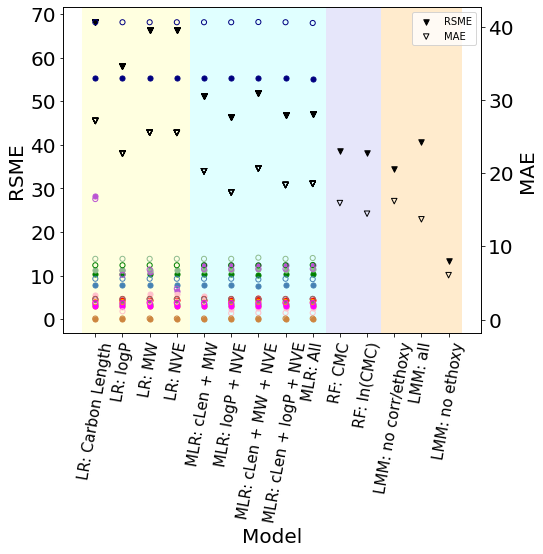

In [23]:
lin_reg_stats_plot_double(RMSE, MAE, RMSE_all, mae_all, RMSE_other, MAE_other, model_name_all, descriptor_list, 
                          "RSME", "MAE", head_group, colours, True, "RMSE_MAE_multi_lin_reg_all.png", False)

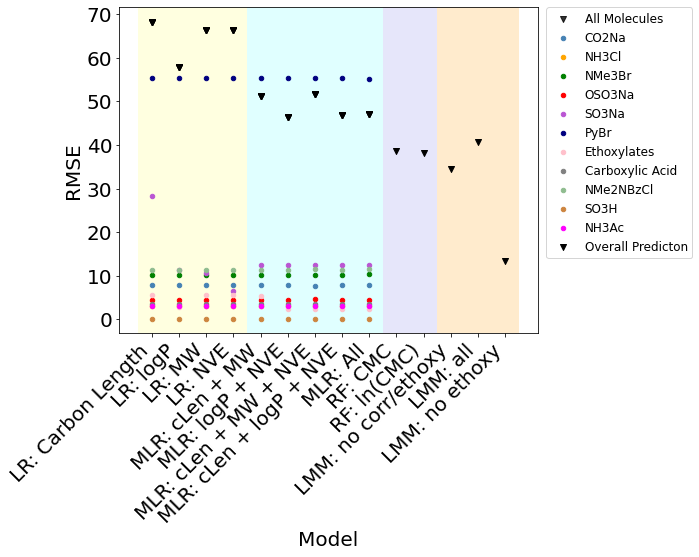

In [24]:
lin_reg_stats_plot(RMSE, RMSE_all, RMSE_other, model_name_all, descriptor_list, "RMSE", head_group, colours, True,
                   "RMSE_multi_lin_reg_all.png", False)

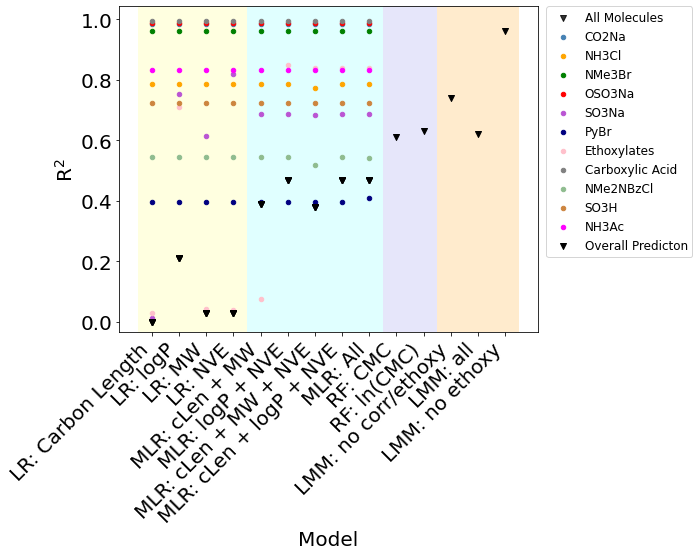

In [25]:
lin_reg_stats_plot(co_det, co_det_all, co_det_other, model_name_all, descriptor_list, "R$^2$", head_group, 
                   colours, True, "co_det_multi_lin_reg_all.png", False)

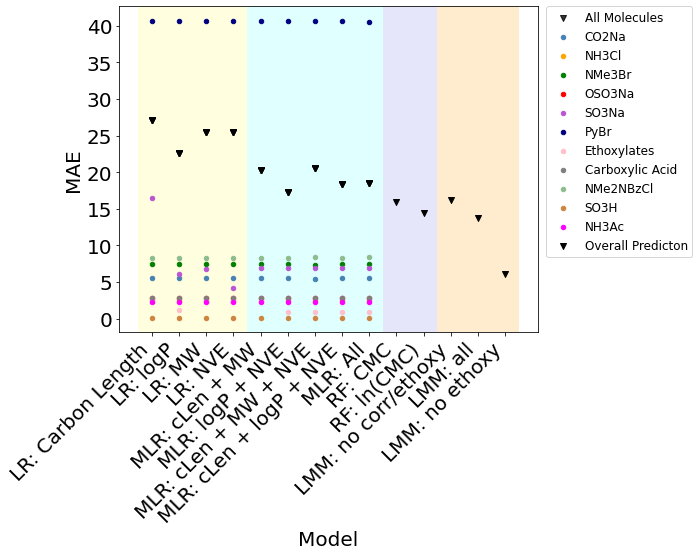

In [26]:
lin_reg_stats_plot(MAE, mae_all, MAE_other, model_name_all, descriptor_list, "MAE", head_group, colours, True, 
                   "MAE_multi_lin_reg_all.png", False)

### Multi-linear regression based on individual head group for a selection of descriptor groups

***Lists must be passed in the same order as the gradients - descriptor must match up***

*MW and Carbon Length*

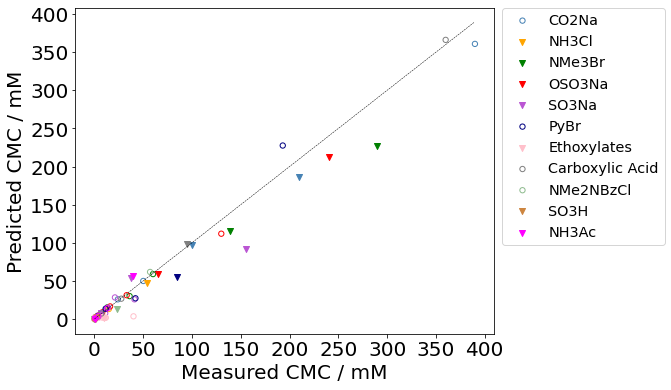

In [27]:
g1_pred, g1_pred_diff = pred_true_cmc_data(cmc_vals_select, 2, g1_grad1, g1_grad2, g1_grad3, 
                                           g1_grad4, g1_y_intercept, MW_select, carbon_len_select,
                                           NVE_select, logp_vals_select, startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(g1_pred, cmc_vals_select, 600, 600, g1_test_ind_list, False, colours, head_group, 
                      "logP_NVE_pred_meas.png", False)

*logP and NVE*

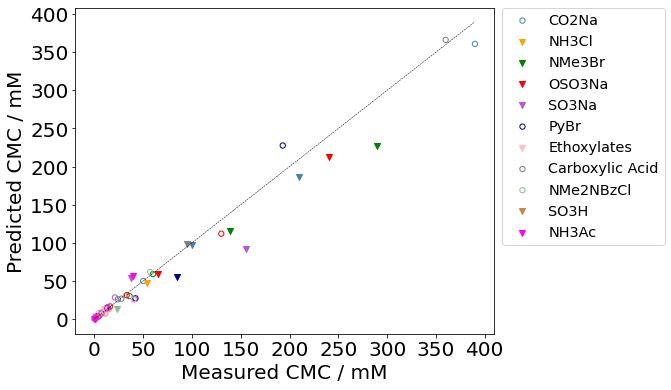

In [28]:
g2_pred, g2_pred_diff = pred_true_cmc_data(cmc_vals_select, 2, g2_grad1, g2_grad2, g2_grad3, 
                                           g2_grad4, g2_y_intercept, logp_vals_select, NVE_select, MW_select, 
                                           carbon_len_select, startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(g2_pred, cmc_vals_select, 600, 600, g2_test_ind_list, False, colours, head_group, 
                      "cLen_MW_pred_meas.png", False)

*cLen, MW and NVE*

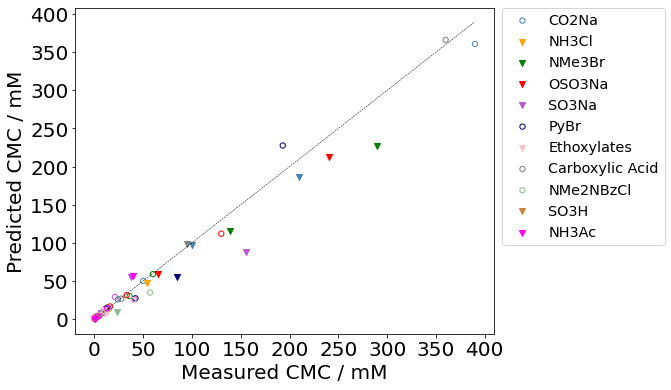

In [29]:
g3_pred, g3_pred_diff = pred_true_cmc_data(cmc_vals_select, 3, g3_grad1, g3_grad2, g3_grad3, 
                                           g3_grad4, g3_y_intercept, MW_select, NVE_select, carbon_len_select, 
                                           logp_vals_select, startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(g3_pred, cmc_vals_select, 600, 600, g3_test_ind_list, False, colours, head_group, 
                      "MW_NVE_cLen_pred_meas.png", False)

*cLen, logP and NVE*

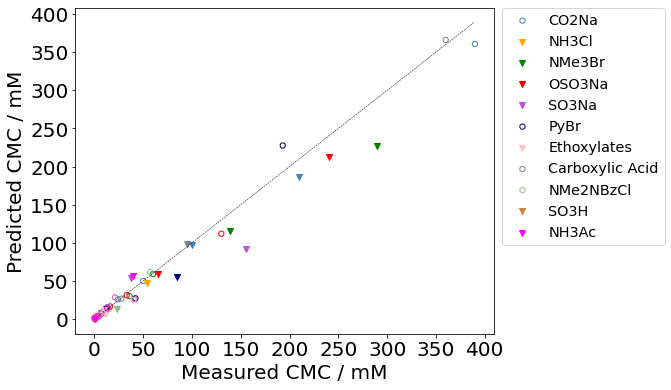

In [30]:
g5_pred, g5_pred_diff = pred_true_cmc_data(cmc_vals_select, 3, g5_grad1, g5_grad2, g5_grad3, 
                                           g5_grad4, g5_y_intercept, carbon_len_select, logp_vals_select, 
                                           NVE_select, MW_select, startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(g5_pred, cmc_vals_select, 600, 600, g5_test_ind_list, False, colours, head_group, 
                      "cLen_logp_NVE_pred_meas.png", False)

*MW, NVE, LogP and Carbon Length*

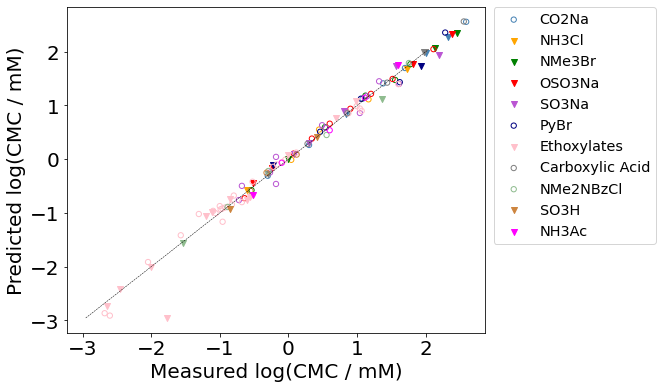

In [31]:
g4_pred, g4_pred_diff = pred_true_cmc_data(cmc_vals_select, 4, g4_grad1, g4_grad2, g4_grad3, 
                                           g4_grad4, g4_y_intercept, MW_select, NVE_select, carbon_len_select,
                                           logp_vals_select, startfunc_pos, endfunc_pos, head_group)

pred_meas_cmc_plotter(g4_pred, cmc_vals_select, 600, 600, g4_test_ind_list, True, colours, head_group, 
                      "cLen_MW_logp_NVE_pred_meas_log.png", False)

### Multi-linear regression based on all data for different descriptor groups

In [32]:
head_group = []
for head in func_group:
    if head not in head_group:
        head_group.append(head)

*MW and Carbon Length*

In [33]:
g2_all_x_test, g2_all_x_train, g2_all_y_train, g2_all_y_test, g2_all_pred, g2_all_var1_coef, g2_all_var2_coef, g2_all_var3_coef, g2_all_var4_coef, g2_all_intercept, g2_all_test_ind_list = multi_linear_reg(cmc_data_sim, 2, "MW", "carbon_len", "n/a", "n/a", show_data, 0.7)

In [34]:
g2_rmse, g2_co_det, g2_mae, g2_rmse_err, g2_co_det_err, g2_mae_err = linear_reg_stats_average(cmc_data_sim, 2, 
                                                                                              "MW", "carbon_len", 
                                                                                              "n/a", "n/a", 0.7)

RMSE Mean:  51.14
Coeff of Det Mean:  0.39
MAE Mean:  20.24




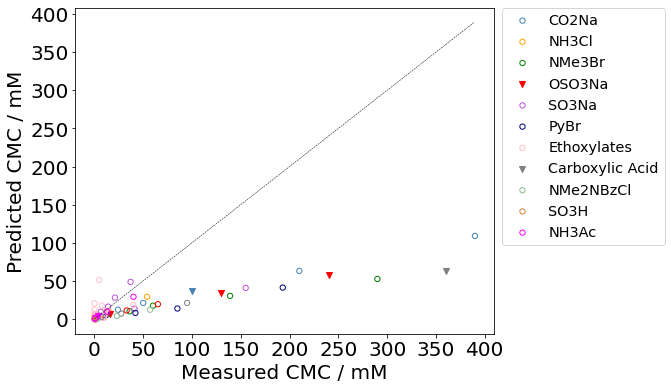

In [35]:
g2_all_pred, g2_all_pred_diff, g2_all_was_test = pred_true_cmc_data_all(cmc_vals, 2, g2_all_var1_coef, 
                                                                        g2_all_var2_coef, g2_all_var3_coef, 
                                                                        g2_all_var4_coef, g2_all_intercept, 
                                                                        mol_weight, carbon_len, val_elec, 
                                                                        logp_vals, startfunc_pos, endfunc_pos, 
                                                                        head_group, g2_all_test_ind_list)

pred_meas_cmc_plotter(g2_all_pred, cmc_vals_select, 600, 600, g2_all_was_test, False, colours, head_group, 
                      "MW_cLen_all_pred_meas.png", False)

*NVE and logP*

In [36]:
g3_all_x_test, g3_all_x_train, g3_all_y_train, g3_all_y_test, g3_all_pred, g3_all_var1_coef, g3_all_var2_coef, g3_all_var3_coef, g3_all_var4_coef, g3_all_intercept, g3_all_test_ind_list = multi_linear_reg(cmc_data_sim, 2, "NVE", "logp", "n/a", "n/a", show_data, 0.7)

In [37]:
g3_rmse, g3_co_det, g3_mae, g3_rmse_err, g3_co_det_err, g3_mae_err = linear_reg_stats_average(cmc_data_sim, 2, 
                                                                                              "NVE", "logp", 
                                                                                              "n/a", "n/a", 0.7)

RMSE Mean:  46.43
Coeff of Det Mean:  0.47
MAE Mean:  17.36




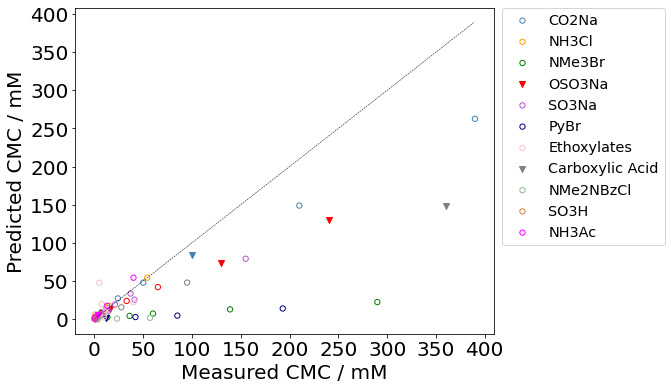

In [38]:
g3_all_pred, g3_all_pred_diff, g3_all_was_test = pred_true_cmc_data_all(cmc_vals, 2, g3_all_var1_coef, 
                                                                        g3_all_var2_coef, g3_all_var3_coef, 
                                                                        g3_all_var4_coef, g3_all_intercept, 
                                                                        val_elec, logp_vals, carbon_len, 
                                                                        mol_weight, startfunc_pos, endfunc_pos, 
                                                                        head_group, g3_all_test_ind_list)

pred_meas_cmc_plotter(g3_all_pred, cmc_vals_select, 600, 600, g3_all_was_test, False, colours, head_group, 
                      "NVE_logp_all_pred_meas.png", False)

*MW, NVE, Carbon Length*

In [39]:
g8_all_x_test, g8_all_x_train, g8_all_y_train, g8_all_y_test, g8_all_pred, g8_all_var1_coef, g8_all_var2_coef, g8_all_var3_coef, g8_all_var4_coef, g8_all_intercept, g8_all_test_ind_list = multi_linear_reg(cmc_data_sim, 3, "MW", "NVE", "carbon_len", "n/a", show_data, 0.7)

In [40]:
g8_rmse, g8_co_det, g8_mae, g8_rmse_err, g8_co_det_err, g8_mae_err = linear_reg_stats_average(cmc_data_sim, 3, 
                                                                                              "MW", "NVE", 
                                                                                              "carbon_len", "n/a", 
                                                                                              0.7)

RMSE Mean:  51.8
Coeff of Det Mean:  0.38
MAE Mean:  20.62




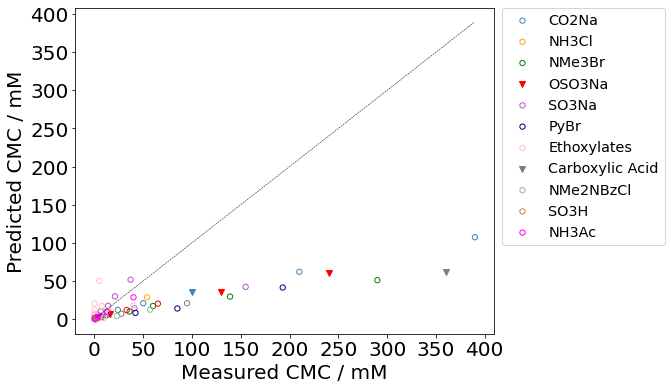

In [41]:
g8_all_pred, g8_all_pred_diff, g8_all_was_test = pred_true_cmc_data_all(cmc_vals, 3, g8_all_var1_coef, 
                                                                        g8_all_var2_coef, g8_all_var3_coef, 
                                                                        g8_all_var4_coef, g8_all_intercept, 
                                                                        mol_weight, val_elec, carbon_len, 
                                                                        logp_vals, startfunc_pos, endfunc_pos, 
                                                                        head_group, g8_all_test_ind_list)

pred_meas_cmc_plotter(g8_all_pred, cmc_vals_select, 600, 600, g8_all_was_test, False, colours, head_group, 
                      "MW_NVE_cLen_all_pred_meas.png", False)

*NVE, Carbon Length, logP*

In [42]:
g7_all_x_test, g7_all_x_train, g7_all_y_train, g7_all_y_test, g7_all_pred, g7_all_var1_coef, g7_all_var2_coef, g7_all_var3_coef, g7_all_var4_coef, g7_all_intercept, g7_all_test_ind_list = multi_linear_reg(cmc_data_sim, 3, "NVE", "carbon_len", "logp", "n/a", show_data, 0.7)

In [43]:
g7_rmse, g7_co_det, g7_mae, g7_rmse_err, g7_co_det_err, g7_mae_err = linear_reg_stats_average(cmc_data_sim, 3, 
                                                                                              "NVE", "carbon_len", 
                                                                                              "logp", "n/a", 0.7)

RMSE Mean:  46.84
Coeff of Det Mean:  0.47
MAE Mean:  18.37




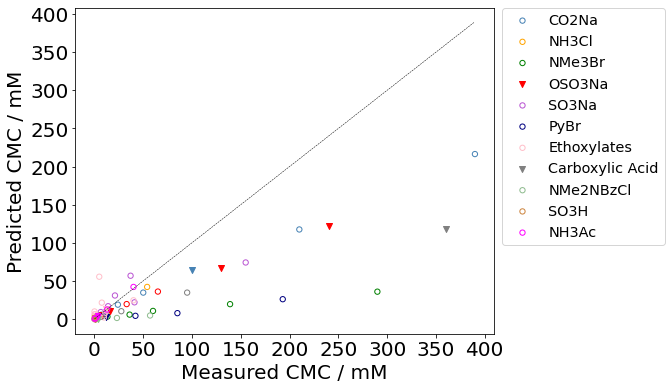

In [44]:
g7_all_pred, g7_all_pred_diff, g7_all_was_test = pred_true_cmc_data_all(cmc_vals, 3, g7_all_var1_coef, 
                                                                        g7_all_var2_coef, g7_all_var3_coef, 
                                                                        g7_all_var4_coef, g7_all_intercept, 
                                                                        val_elec, carbon_len, logp_vals, 
                                                                        mol_weight, startfunc_pos, endfunc_pos, 
                                                                        head_group, g7_all_test_ind_list)

pred_meas_cmc_plotter(g7_all_pred, cmc_vals_select, 600, 600, g7_all_was_test, False, colours, head_group, 
                      "NVE_cLen_logp_all_pred_meas.png", False)

*MW, NVE, Carbon Length, logP*

In [45]:
g9_all_x_test, g9_all_x_train, g9_all_y_train, g9_all_y_test, g9_all_pred, g9_all_var1_coef, g9_all_var2_coef, g9_all_var3_coef, g9_all_var4_coef, g9_all_intercept, g9_all_test_ind_list = multi_linear_reg(cmc_data_sim, 4, "MW", "NVE", "carbon_len", "logp", show_data, 0.7)

In [46]:
g9_rmse, g9_co_det, g9_mae, g9_rmse_err, g9_co_det_err, g9_mae_err = linear_reg_stats_average(cmc_data_sim, 4, 
                                                                                              "MW", "NVE", 
                                                                                              "carbon_len", 
                                                                                              "logp", 0.7)

RMSE Mean:  47.08
Coeff of Det Mean:  0.47
MAE Mean:  18.53




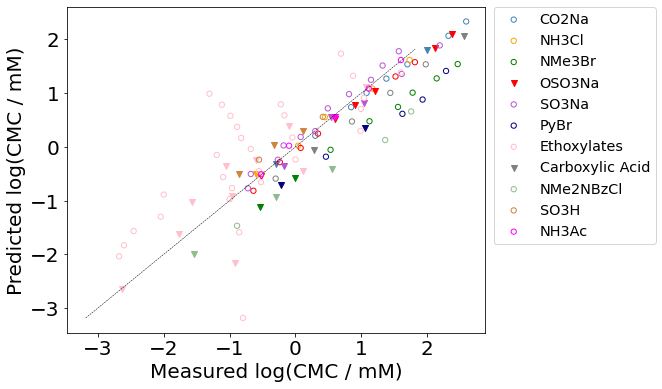

In [47]:
g9_all_pred, g9_all_pred_diff, g9_all_was_test = pred_true_cmc_data_all(cmc_vals, 4, g9_all_var1_coef, 
                                                                        g9_all_var2_coef, g9_all_var3_coef, 
                                                                        g9_all_var4_coef, g9_all_intercept, 
                                                                        mol_weight, val_elec, carbon_len, 
                                                                        logp_vals, startfunc_pos, endfunc_pos, 
                                                                        head_group, g9_all_test_ind_list)

pred_meas_cmc_plotter(g9_all_pred, cmc_vals_select, 600, 600, g9_all_was_test, True, colours, head_group, 
                      "MW_NVE_cLen_logp_all_pred_meas_log.png", False)

### Statistics plot

In [48]:
RMSE_pred_all = [68.19, 58.01, 66.41, 66.43, 51.14, 46.43, 51.80, 46.84, 47.08]
co_det_pred_all = [0.0, 0.21, 0.03, 0.03, 0.39, 0.47, 0.38, 0.47, 0.47]
MAE_pred_all = [27.12, 22.67, 25.52, 25.49, 20.24, 17.36, 20.62, 18.37, 18.53]

names = ["cLen", "logP", "MW", "NVE", "cLen + MW", "logP + NVE", "cLen + MW + NVE", "cLen + logP + NVE", "All"]

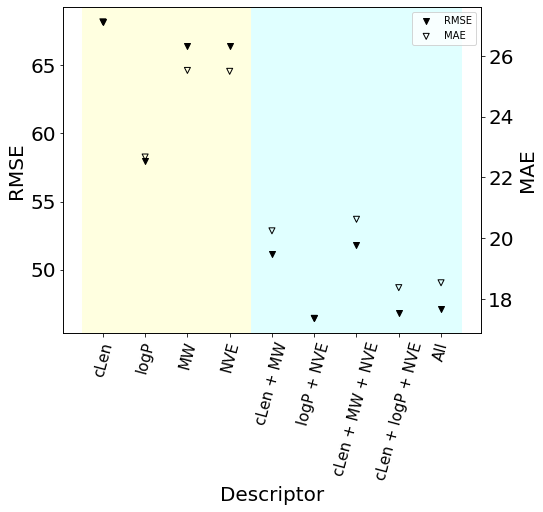

In [49]:
lin_reg_stats_plot_all_double(RMSE_pred_all, MAE_pred_all, names, "RMSE", "MAE", "RMSE_MAE_linreg_multi.png", 
                              False)

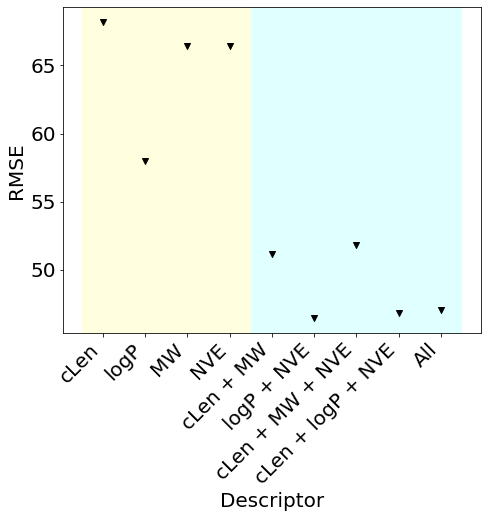

In [50]:
lin_reg_stats_plot_all(RMSE_pred_all, names, "RMSE", "RMSE_linreg_multi.png", False)

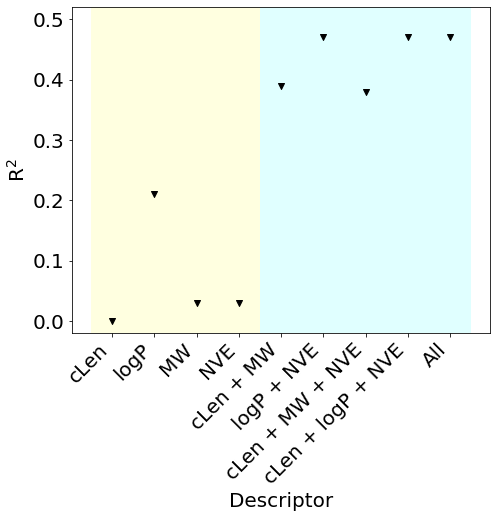

In [51]:
lin_reg_stats_plot_all(co_det_pred_all, names, "R$^{2}$", "co_det_linreg_multi.png", False)

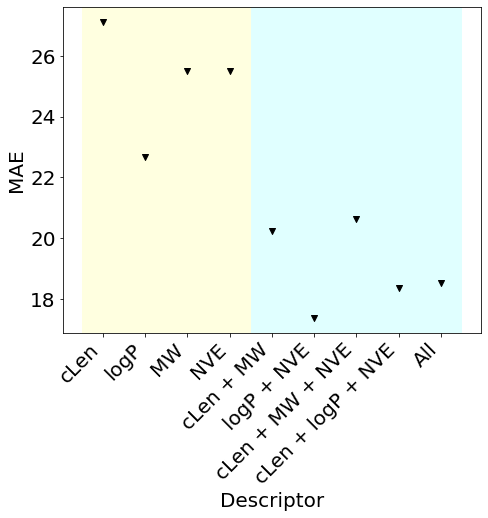

In [52]:
lin_reg_stats_plot_all(MAE_pred_all, names, "MAE", "MAE_linreg_multi.png", False)

### Removing high CMC values

There are fewer data points avaliable at high CMC values so this investigates if there is any improvement if high values are excluded.

In [53]:
high_cmc_ind = []
for ind, cmc in enumerate(cmc_vals):
    if cmc >= 50.0: # only does linear regression for CMC values below this
        high_cmc_ind.append(ind)

In [54]:
cmc_data_red = cmc_data[cmc_data.CMC < 50.0]

func_group2 = []; carbon_len2 = []; cmc_vals2 = []; mol_weight2 = []; val_elec2 = []; logp_vals2 = []

for ind, row in cmc_data_red.iterrows():      # reads in the rows of the data 
    
    # extracts relevant information
    func_group_i = row["func_group"]; carbon_len_i = row["carbon_len"]; cmc_i = row["CMC"]               
    mol_weight_i = row["MW"]; val_elec_i = row["NVE"]; logp_i = row["logP"]             
    
    # adds the data to separate lists
    func_group2.append(func_group_i); carbon_len2.append(carbon_len_i); cmc_vals2.append(cmc_i)
    mol_weight2.append(mol_weight_i); val_elec2.append(val_elec_i); logp_vals2.append(logp_i)

In [55]:
endfunc_pos2 = []
startfunc_pos2 = [0]

# finds index where each head group starts and ends 
for ind, func in enumerate(func_group2): # loops through list of head groups
    if ind < (len(func_group2)-1) and func != func_group2[ind+1]: # checks if next elem in list has same head group
        startfunc_pos2.append(ind+1)
        endfunc_pos2.append(ind+1)
    elif ind == (len(func_group2)-1): # on the last one, only append to end position list
        endfunc_pos2.append(ind+1)

In [56]:
# finds ln(CMC) and creates new data frame with only values wanted
ln_cmc_vals2 = []
for cmc in cmc_vals2:
    ln_cmc = np.log(cmc)
    ln_cmc_vals2.append(ln_cmc)

cmc_data_sim2 = pd.DataFrame(ln_cmc_vals2, columns = ["ln_cmc"])
cmc_data_sim2["MW"] = mol_weight2
cmc_data_sim2["NVE"] = val_elec2
cmc_data_sim2["logp"] = logp_vals2
cmc_data_sim2["carbon_len"] = carbon_len2

cmc_vals_select2 = []

for num in range(len(head_group)):  # loops through each head group
    indiv_cmc = [] # finds predicted cmc and appends to list
    for val in cmc_vals2[startfunc_pos2[num]:endfunc_pos2[num]]:
        indiv_cmc.append(val) # reassigns the predicted value back to the head group associated with it
    cmc_vals_select2.append(indiv_cmc) # puts data back into a list of lists based on head group

*MW, NVE, Carbon Length, logP*

In [57]:
g1_red_x_test, g1_red_x_train, g1_red_y_train, g1_red_y_test, g1_red_pred, g1_red_var1_coef, g1_red_var2_coef, g1_red_var3_coef, g1_red_var4_coef, g1_red_intercept, g1_red_test_ind_list = multi_linear_reg(cmc_data_sim2, 4, "MW", "carbon_len", "NVE", "logp", show_data, 0.7)

In [58]:
g1_red_rmse, g1_red_co_det, g1_red_mae, g1_red_rmse_err, g1_red_co_det_err, g1_red_mae_err = linear_reg_stats_average(cmc_data_sim, 4, "MW", "carbon_len", "NVE", "logp", 0.7)

RMSE Mean:  47.08
Coeff of Det Mean:  0.47
MAE Mean:  18.53




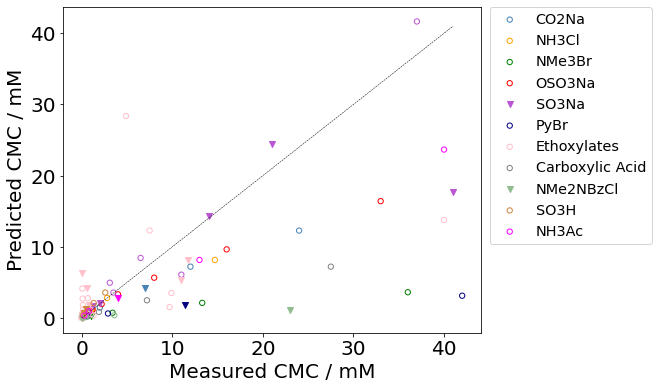

In [59]:
g1_red_pred, g1_red_pred_diff, g1_red_was_test = pred_true_cmc_data_all(cmc_vals2, 4, g1_red_var1_coef, 
                                                                        g1_red_var2_coef, g1_red_var3_coef, 
                                                                        g1_red_var4_coef, g1_red_intercept, 
                                                                        mol_weight2, carbon_len2, val_elec2, 
                                                                        logp_vals2, startfunc_pos2, endfunc_pos2, 
                                                                        head_group, g1_red_test_ind_list)

pred_meas_cmc_plotter(g1_red_pred, cmc_vals_select2, 600, 600, g1_red_was_test, False, colours, head_group, 
                      "MW_cLen_NVE_logp_red_pred_meas.png", False)